### Evaluation metrics for binary classification : Logistic Regression

Follow these instructions:

1. Load the ```"titanic"``` dataset from the ```seaborn``` library.

2. Perform analysis, cleaning, and any necessary preprocessing on the data set. Note: You are not allowed to discard data points.

3. Split the data into ```train``` and ```validation``` with the following ratio 8-2 using the ```train_test_split()``` function from the ```sklearn``` library. Note that you must set ```random_state = 1```.

4. Build a model that will predict whether the passenger survived the accident or not.

5. Model accuracy for both ```train``` and ```validation``` data should be above ```80%```.


**Note:** Please include explanations at all stages.

## 1. Load the "titanic" dataset from the seaborn library

In [67]:
# Начало кода
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

titanic = sns.load_dataset("titanic")
# Конец кода

In [70]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## 2. Let's clean and pre-process the data set

First, I would like to replace categorical values ​​with numeric ones.

In [3]:
titanic["class"].unique

<bound method Series.unique of 0       Third
1       First
2       Third
3       First
4       Third
        ...  
886    Second
887     First
888     Third
889     First
890     Third
Name: class, Length: 891, dtype: category
Categories (3, object): ['First', 'Second', 'Third']>

In [4]:
titanic["who"].unique()

array(['man', 'woman', 'child'], dtype=object)

For interpreted values ​​we use `label_encoder`, for the rest we use `one_hot_encoder`.

In [5]:
titanic["sex"].replace("male", 1, inplace=True)
titanic["sex"].replace("female", 0, inplace=True)
titanic["class"].replace("First", 1, inplace=True)
titanic["class"].replace("Second", 2, inplace=True)
titanic["class"].replace("Third", 3, inplace=True)
titanic["who"].replace("man", 1, inplace=True)
titanic["who"].replace("woman", 0, inplace=True)
titanic["who"].replace("child", 2, inplace=True)
titanic["adult_male"].replace(True, 1, inplace=True)
titanic["adult_male"].replace(False, 0, inplace=True)
titanic["alive"].replace("yes", 1, inplace=True)
titanic["alive"].replace("no", 0, inplace=True)
titanic["alone"].replace(True, 1, inplace=True)
titanic["alone"].replace(False, 0, inplace=True)

titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,3,1,1.0,NaN,Southampton,0,0.0
1,1,1,0,38.0,1,0,71.2833,C,1,0,0.0,C,Cherbourg,1,0.0
2,1,3,0,26.0,0,0,7.9250,S,3,0,0.0,NaN,Southampton,1,1.0
3,1,1,0,35.0,1,0,53.1000,S,1,0,0.0,C,Southampton,1,0.0
4,0,3,1,35.0,0,0,8.0500,S,3,1,1.0,NaN,Southampton,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,2,1,1.0,NaN,Southampton,0,1.0
887,1,1,0,19.0,0,0,30.0000,S,1,0,0.0,B,Southampton,1,1.0
888,0,3,0,NaN,1,2,23.4500,S,3,0,0.0,NaN,Southampton,0,0.0
889,1,1,1,26.0,0,0,30.0000,C,1,1,1.0,C,Cherbourg,1,1.0


We can notice that the `survived` and `alive` columns have very similar values. Let's check how much.

In [6]:
(titanic["survived"] == titanic["alive"]).value_counts()

True    891
dtype: int64

`alive` completely repeats the `survived` attribute, which will be our target. Therefore, we can omit the `alive` sign.

In [7]:
titanic = titanic.drop(columns="alive")

But before using `one_hot_encoding` it is still better to fill in the missing data.

In [8]:
titanic.describe()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,alone
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,0.789001,0.602694,0.602694
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.594291,0.489615,0.489615
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,1.000000,1.000000,1.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000,1.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,1.000000,1.000000


In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    int64   
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    int64   
 10  adult_male   891 non-null    float64 
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alone        891 non-null    float64 
dtypes: category(2), float64(4), int64(6), object(2)
memory usage: 85.9+ KB


Not all columns contain 891 values. Let's consider features with missing values.

In [10]:
titanic["age"].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [11]:
titanic["embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [12]:
titanic["embark_town"].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [13]:
titanic["deck"].unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['C', 'E', 'G', 'D', 'A', 'B', 'F']

Since we will in any case use `one_hot_encoding` for the `embarked`, `embark_town` and `deck` features, we can replace `NaN` with any other value - for example, "no"

In [14]:
titanic['deck'] = titanic['deck'].cat.add_categories('Unknown')
titanic['deck'].fillna('Unknown', inplace =True)

In [15]:
titanic['embarked'].fillna('Unknown', inplace =True)
titanic['embark_town'].fillna('Unknown', inplace =True)

In [16]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    int64   
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    int64   
 10  adult_male   891 non-null    float64 
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alone        891 non-null    float64 
dtypes: category(2), float64(4), int64(6), object(2)
memory usage: 85.9+ KB


Missing values ​​for the “age” attribute can be replaced with the average value for the column. But I think that would be too rude. Let's try to replace the missing values ​​with the values ​​of similar rows. To determine the similarity of two vectors we use `scipy.spatial.distance.cosine`. However, we still have categorical values, so we use `one_hot_encoding` first.

In [17]:
import pandas as pd
numeric_titanic = pd.get_dummies(titanic, columns=['embarked', 'embark_town', 'deck'])
numeric_titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'class',
       'who', 'adult_male', 'alone', 'embarked_C', 'embarked_Q', 'embarked_S',
       'embarked_Unknown', 'embark_town_Cherbourg', 'embark_town_Queenstown',
       'embark_town_Southampton', 'embark_town_Unknown', 'deck_A', 'deck_B',
       'deck_C', 'deck_D', 'deck_E', 'deck_F', 'deck_G', 'deck_Unknown'],
      dtype='object')

In [18]:
numeric_titanic

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,...,embark_town_Southampton,embark_town_Unknown,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_Unknown
0,0,3,1,22.0,1,0,7.2500,3,1,1.0,...,1,0,0,0,0,0,0,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0.0,...,0,0,0,0,1,0,0,0,0,0
2,1,3,0,26.0,0,0,7.9250,3,0,0.0,...,1,0,0,0,0,0,0,0,0,1
3,1,1,0,35.0,1,0,53.1000,1,0,0.0,...,1,0,0,0,1,0,0,0,0,0
4,0,3,1,35.0,0,0,8.0500,3,1,1.0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2,1,1.0,...,1,0,0,0,0,0,0,0,0,1
887,1,1,0,19.0,0,0,30.0000,1,0,0.0,...,1,0,0,1,0,0,0,0,0,0
888,0,3,0,NaN,1,2,23.4500,3,0,0.0,...,1,0,0,0,0,0,0,0,0,1
889,1,1,1,26.0,0,0,30.0000,1,1,1.0,...,0,0,0,0,1,0,0,0,0,0


Now let's try to find vectors similar to those that do not have the value of the `age` attribute. When calculating `similarity` we will use a vector with the values ​​of all signs except the target `age`.

In [19]:
nas = numeric_titanic[numeric_titanic["age"].isna() == True].index.tolist()

In [20]:
import scipy
for idx in nas:
    similarities = {}
    navector = numeric_titanic.drop(columns='age').loc[idx].values
    for idx2 in numeric_titanic[numeric_titanic["age"].isna() == False].index.tolist():
        vector2 = numeric_titanic.drop(columns='age').loc[idx2].values
        similarity = 1 - scipy.spatial.distance.cosine(navector,vector2)
        similarities[idx2]=similarity
        
    max_idx2 = [key for key in similarities.keys() if similarities[key] == max(similarities.values())][0]
    replacing_value = numeric_titanic["age"].loc[max_idx2]
    numeric_titanic.at[idx, 'age']= replacing_value

In [21]:
similarities

{0: 0.9085087634073239,
 1: 0.9805828490311704,
 2: 0.9304751783763521,
 3: 0.9830093249690779,
 4: 0.9224224377748935,
 5: 0.9217632842313502,
 6: 0.9819523643397228,
 7: 0.9892638982923231,
 8: 0.9734933720028671,
 9: 0.9873286474745191,
 10: 0.9862321581655026,
 11: 0.9848441368228138,
 12: 0.9224224377748935,
 13: 0.994695549707806,
 14: 0.9130434040204417,
 15: 0.9913719874136602,
 16: 0.9881973748793831,
 17: 0.9799095922194868,
 18: 0.9948743681133047,
 19: 0.9054327478364079,
 20: 0.9902799825784248,
 21: 0.9768459386561931,
 22: 0.9031463533839669,
 23: 0.9826655164984617,
 24: 0.9902956594102419,
 25: 0.99568190072131,
 26: 0.893627479230283,
 27: 0.9793940039077571,
 28: 0.9205376699312651,
 29: 0.9191933722270215,
 30: 0.981954924176588,
 31: 0.9789972306801082,
 32: 0.9178073473900857,
 33: 0.972638348606616,
 34: 0.9805696761844811,
 35: 0.9835440829618443,
 36: 0.8880148924894637,
 37: 0.9224224377748935,
 38: 0.9928197293608866,
 39: 0.9542906183630265,
 40: 0.962448757

In [22]:
numeric_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   survived                 891 non-null    int64   
 1   pclass                   891 non-null    int64   
 2   sex                      891 non-null    int64   
 3   age                      891 non-null    float64 
 4   sibsp                    891 non-null    int64   
 5   parch                    891 non-null    int64   
 6   fare                     891 non-null    float64 
 7   class                    891 non-null    category
 8   who                      891 non-null    int64   
 9   adult_male               891 non-null    float64 
 10  alone                    891 non-null    float64 
 11  embarked_C               891 non-null    uint8   
 12  embarked_Q               891 non-null    uint8   
 13  embarked_S               891 non-null    uint8   
 14  embarked_U

We now have high-quality and complete numerical information.

In [23]:
numeric_titanic

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,...,embark_town_Southampton,embark_town_Unknown,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_Unknown
0,0,3,1,22.0,1,0,7.2500,3,1,1.0,...,1,0,0,0,0,0,0,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0.0,...,0,0,0,0,1,0,0,0,0,0
2,1,3,0,26.0,0,0,7.9250,3,0,0.0,...,1,0,0,0,0,0,0,0,0,1
3,1,1,0,35.0,1,0,53.1000,1,0,0.0,...,1,0,0,0,1,0,0,0,0,0
4,0,3,1,35.0,0,0,8.0500,3,1,1.0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2,1,1.0,...,1,0,0,0,0,0,0,0,0,1
887,1,1,0,19.0,0,0,30.0000,1,0,0.0,...,1,0,0,1,0,0,0,0,0,0
888,0,3,0,30.0,1,2,23.4500,3,0,0.0,...,1,0,0,0,0,0,0,0,0,1
889,1,1,1,26.0,0,0,30.0000,1,1,1.0,...,0,0,0,0,1,0,0,0,0,0


## 3. Divide the data into train and validation

In [24]:
titanic_label = numeric_titanic["survived"]
numeric_titanic = numeric_titanic.drop(columns="survived")
numeric_titanic

,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,alone,...,embark_town_Southampton,embark_town_Unknown,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_Unknown
0,3,1,22.0,1,0,7.2500,3,1,1.0,0.0,...,1,0,0,0,0,0,0,0,0,1
1,1,0,38.0,1,0,71.2833,1,0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
2,3,0,26.0,0,0,7.9250,3,0,0.0,1.0,...,1,0,0,0,0,0,0,0,0,1
3,1,0,35.0,1,0,53.1000,1,0,0.0,0.0,...,1,0,0,0,1,0,0,0,0,0
4,3,1,35.0,0,0,8.0500,3,1,1.0,1.0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2,1,1.0,1.0,...,1,0,0,0,0,0,0,0,0,1
887,1,0,19.0,0,0,30.0000,1,0,0.0,1.0,...,1,0,0,1,0,0,0,0,0,0
888,3,0,30.0,1,2,23.4500,3,0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
889,1,1,26.0,0,0,30.0000,1,1,1.0,1.0,...,0,0,0,0,1,0,0,0,0,0


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         numeric_titanic, titanic_label, test_size=0.2, random_state=1)

In [26]:
X_train

,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,alone,...,embark_town_Southampton,embark_town_Unknown,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_Unknown
301,3,1,28.0,2,0,23.2500,3,1,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1
309,1,0,30.0,0,0,56.9292,1,0,0.0,1.0,...,0,0,0,0,0,0,1,0,0,0
516,2,0,34.0,0,0,10.5000,2,0,0.0,1.0,...,1,0,0,0,0,0,0,1,0,0
120,2,1,21.0,2,0,73.5000,2,1,1.0,0.0,...,1,0,0,0,0,0,0,0,0,1
570,2,1,62.0,0,0,10.5000,2,1,1.0,1.0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,3,1,19.0,0,0,7.6500,3,1,1.0,1.0,...,1,0,0,0,0,0,0,1,0,0
767,3,0,30.5,0,0,7.7500,3,0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
72,2,1,21.0,0,0,73.5000,2,1,1.0,1.0,...,1,0,0,0,0,0,0,0,0,1
235,3,0,45.0,0,0,7.5500,3,0,0.0,1.0,...,1,0,0,0,0,0,0,0,0,1


In [27]:
X_test

,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,alone,...,embark_town_Southampton,embark_town_Unknown,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_Unknown
862,1,0,48.0,0,0,25.9292,1,0,0.0,1.0,...,1,0,0,0,0,1,0,0,0,0
223,3,1,28.0,0,0,7.8958,3,1,1.0,1.0,...,1,0,0,0,0,0,0,0,0,1
84,2,0,17.0,0,0,10.5000,2,0,0.0,1.0,...,1,0,0,0,0,0,0,0,0,1
680,3,0,21.0,0,0,8.1375,3,0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
535,2,0,7.0,0,2,26.2500,2,2,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,1,0,49.0,0,0,25.9292,1,0,0.0,1.0,...,1,0,0,0,0,1,0,0,0,0
815,1,1,40.0,0,0,0.0000,1,1,1.0,1.0,...,1,0,0,1,0,0,0,0,0,0
629,3,1,21.0,0,0,7.7333,3,1,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1
421,3,1,21.0,0,0,7.7333,3,1,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1


## 4. Let's build a model based on logistic regression

Let's create and train a Logistic Regression model using data from the training set.

In [28]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter = 1000)
classifier.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

The `max_iter` parameter was set to 1000 because with the default number of 100, the model cannot achieve convergence.

In [29]:
predictions = classifier.predict(X_test)
accuracys = (predictions == y_test).sum() / len(y_test)

print(f"The accuracy of the Logistic Regression model on test data is: {accuracy*100:.2f} %")

The accuracy of the Logistic Regression model on test data is: 80.45 %


In [33]:
y_test

862    1
223    0
84     1
680    0
535    1
      ..
796    1
815    0
629    0
421    0
448    1
Name: survived, Length: 179, dtype: int64

In [34]:
predictions

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1], dtype=int64)

In [30]:
score = classifier.score(X_train, y_train)
print(f"The accuracy of the Logistic Regression model on train data is: {score*100:.2f} %")

The accuracy of the Logistic Regression model on train data is: 84.13 %


In [31]:
X_test

,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,alone,...,embark_town_Southampton,embark_town_Unknown,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_Unknown
862,1,0,48.0,0,0,25.9292,1,0,0.0,1.0,...,1,0,0,0,0,1,0,0,0,0
223,3,1,28.0,0,0,7.8958,3,1,1.0,1.0,...,1,0,0,0,0,0,0,0,0,1
84,2,0,17.0,0,0,10.5000,2,0,0.0,1.0,...,1,0,0,0,0,0,0,0,0,1
680,3,0,21.0,0,0,8.1375,3,0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
535,2,0,7.0,0,2,26.2500,2,2,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,1,0,49.0,0,0,25.9292,1,0,0.0,1.0,...,1,0,0,0,0,1,0,0,0,0
815,1,1,40.0,0,0,0.0000,1,1,1.0,1.0,...,1,0,0,1,0,0,0,0,0,0
629,3,1,21.0,0,0,7.7333,3,1,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1
421,3,1,21.0,0,0,7.7333,3,1,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1


#### The accuracy of the model on the training set is 84.27%, while on the test set the value is 80.45%.

### Accuracy:

In [35]:
predictions

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1], dtype=int64)

In [36]:
def binary_classification_accuracy(y_true, y_pred):
    
    pass


In [37]:
binary_classification_accuracy(y_true = y_test , y_pred = predictions)

0.8044692737430168

### Precision:

In [39]:
def binary_classification_precision(y_true, y_pred):

    pass


In [40]:
binary_classification_precision(y_true = y_test , y_pred = predictions)

0.7878787878787878

### Recall:

In [42]:
def binary_classification_recall(y_true, y_pred):
   
    
    pass

In [43]:
binary_classification_recall(y_true = y_test , y_pred = predictions)

0.7123287671232876

In [50]:
def binary_classification_confusion_matrix(y_true, y_pred):
 
    pass


In [51]:
binary_classification_confusion_matrix(y_true = y_test , y_pred = predictions)

,P,N
T,52,14
F,92,21


In [49]:
pd.DataFrame({'P': [52,14], 'N': [92,21]}, index = ['T','F'])

,P,N
T,52,92
F,14,21


## AUC

In [59]:
def plot_roc_and_calculate_auc(y_true, y_scores):

    # your code
    
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, linestyle='-', color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Chance line')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()
    
    return auc,fpr, tpr


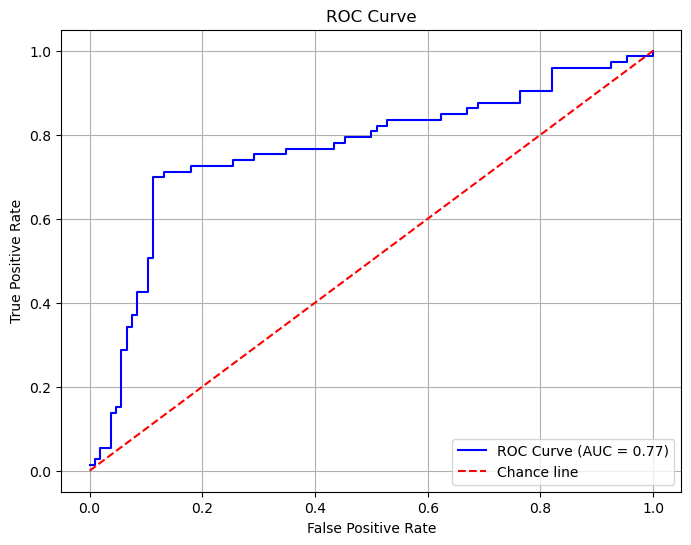

(0.7650555699147067,
 [0.0,
  0.009433962264150943,
  0.009433962264150943,
  0.018867924528301886,
  0.018867924528301886,
  0.018867924528301886,
  0.02830188679245283,
  0.03773584905660377,
  0.03773584905660377,
  0.03773584905660377,
  0.03773584905660377,
  0.03773584905660377,
  0.03773584905660377,
  0.03773584905660377,
  0.04716981132075472,
  0.04716981132075472,
  0.05660377358490566,
  0.05660377358490566,
  0.05660377358490566,
  0.05660377358490566,
  0.05660377358490566,
  0.05660377358490566,
  0.05660377358490566,
  0.05660377358490566,
  0.05660377358490566,
  0.05660377358490566,
  0.05660377358490566,
  0.0660377358490566,
  0.0660377358490566,
  0.0660377358490566,
  0.0660377358490566,
  0.0660377358490566,
  0.07547169811320754,
  0.07547169811320754,
  0.07547169811320754,
  0.08490566037735849,
  0.08490566037735849,
  0.08490566037735849,
  0.08490566037735849,
  0.08490566037735849,
  0.09433962264150944,
  0.10377358490566038,
  0.10377358490566038,
  0.10

In [60]:
plot_roc_and_calculate_auc(y_true = y_test , y_scores = predictions)

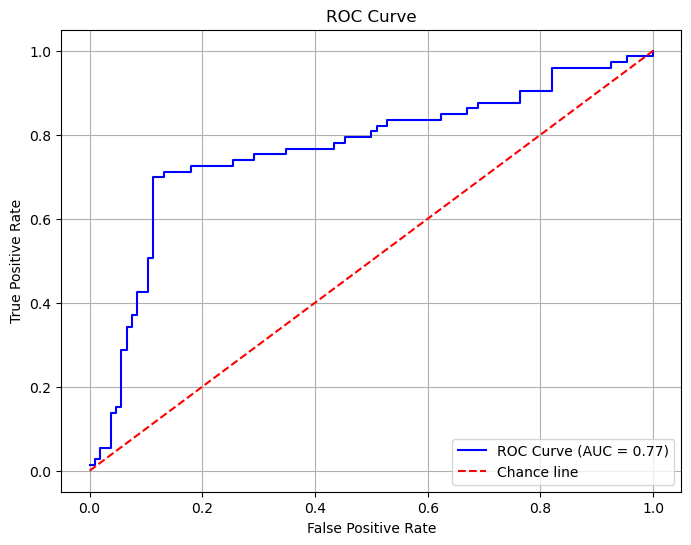

In [ ]:
Gini Coefficient: 0.92

In [63]:
def calculate_gini_from_auc(y_true, y_scores):

    # your code
    
    return gini

# Usage example with Pandas Series or NumPy arrays
import pandas as pd
y_true = pd.Series([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])
y_scores = np.array([0.9, 0.1, 0.3, 0.8, 0.05, 0.95, 0.5, 0.2, 0.85, 0.05])

gini_coefficient = calculate_gini_from_auc(y_true, y_scores)
print(f"Gini Coefficient: {gini_coefficient:.2f}")

Gini Coefficient: 0.92


In [64]:
calculate_gini_from_auc(y_true = y_test , y_scores = predictions)

0.5301111398294134

### Great job